# Check Topo stacks

In [14]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.mask import mask

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import numpy.ma as ma
from pyproj import Proj, Transformer

import os, sys
ICESAT2_BOREAL_REPO_PATH = '/projects/code/icesat2_boreal'               #'/projects/icesat2_boreal' # /projects/Developer/icesat2_boreal/lib
ICESAT2_BOREAL_LIB_PATH = ICESAT2_BOREAL_REPO_PATH + '/lib'
sys.path.append(ICESAT2_BOREAL_LIB_PATH)

from CovariateUtils_topo import *

In [4]:
# Check Topo stacks that are missing a row and col of data?
z = pd.read_csv('s3://maap-ops-workspace/shared/montesano/DPS_tile_lists/run_build_stack_topo/build_stack_v2023_2/CopernicusGLO30/Topo_tindex_master.csv')
topo_stack_cog_fn = z[z.tile_num==1842].s3_path.to_list()[0]
topo_stack_cog_fn

's3://maap-ops-workspace/montesano/dps_output/run_build_stack_topo/build_stack_v2023_2/CopernicusGLO30/2024/01/13/14/47/29/163538/CopernicusGLO30_1842_cog_topo_stack.tif'

s3://maap-ops-workspace/montesano/dps_output/run_build_stack_topo/build_stack_v2023_2/CopernicusGLO30/2024/01/13/14/47/29/163538/CopernicusGLO30_1842_cog_topo_stack.tif
5
(5, 3000, 3000)
-2.152394 629.84094
-9999.0 59.04891
0.0 1.0
-9999.0 31.202972
0.0 1.0
CPU times: user 2.34 s, sys: 510 ms, total: 2.85 s
Wall time: 8.9 s


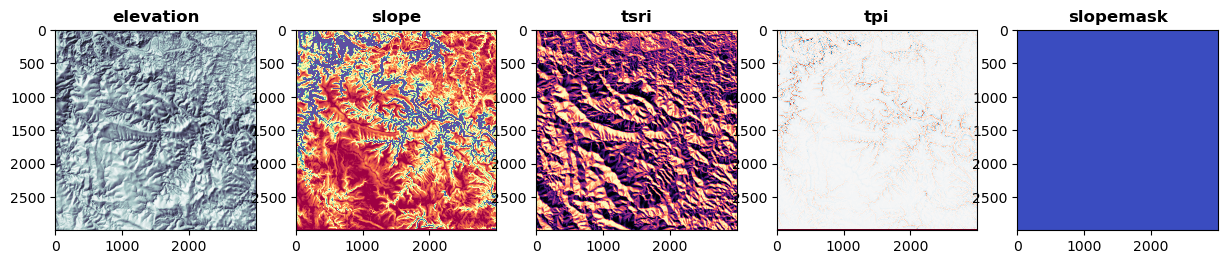

In [29]:
%%time
topo_stack_names = ["elevation","slope","tsri","tpi", "slopemask"]
from rasterio.plot import show_hist

# Read back in the topo_stack_cog_fn and plot
print(topo_stack_cog_fn)

with rasterio.open(topo_stack_cog_fn) as dataset:
    #dataset = rasterio.open(topo_stack_cog_fn)
    print(dataset.count)

    topo_stack = dataset.read()

    # This should work once you figure out the move axis of the stack: need 3 bands
    n: int = len(topo_stack)
    topo_cmaps = ["bone","Spectral", "magma", "RdBu", "coolwarm"]
    print(topo_stack.shape)

    fig, axes = plt.subplots(1,n, figsize=(n*3,5))

    for i in range(n):

        print(topo_stack[i].min(), topo_stack[i].max())
        array_to_show = topo_stack[i]
        clims = (np.nanpercentile(topo_stack[i], 10), np.nanpercentile(topo_stack[i], 90))

        if 'elevation' in topo_stack_names[i]:
            #Replace elevation with its hillshade for display purposes
            array_to_show = hillshade(topo_stack[i],315,45)
            clims = None

        show(array_to_show, ax=axes[i], cmap=topo_cmaps[i], clim=clims, title=topo_stack_names[i])

        if False:
            fig, (axmap, axhist) = plt.subplots(1,2, figsize=(10,5))
            show(array_to_show, ax=axmap, cmap=topo_cmaps[i], clim=clims, title=topo_stack_names[i])
            show_hist(topo_stack[i], ax=axhist, title=topo_stack_names[i], bins=50, lw=0.0, stacked=True, alpha=1)


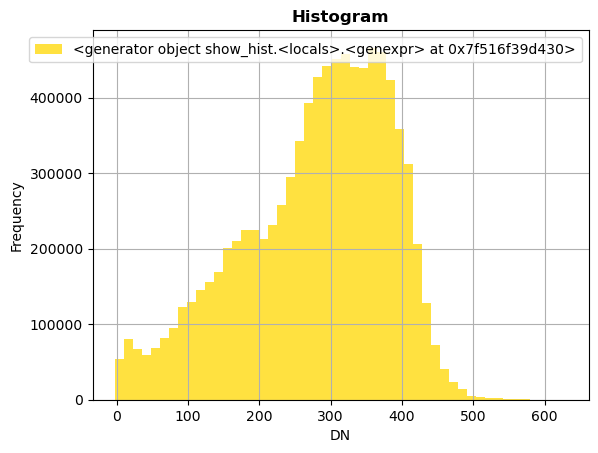

In [38]:
with rasterio.open(topo_stack_cog_fn) as dataset:
    show_hist(dataset.read(1), bins=50, lw=0.0, stacked=True, alpha=0.75, histtype='stepfilled', title="Histogram")

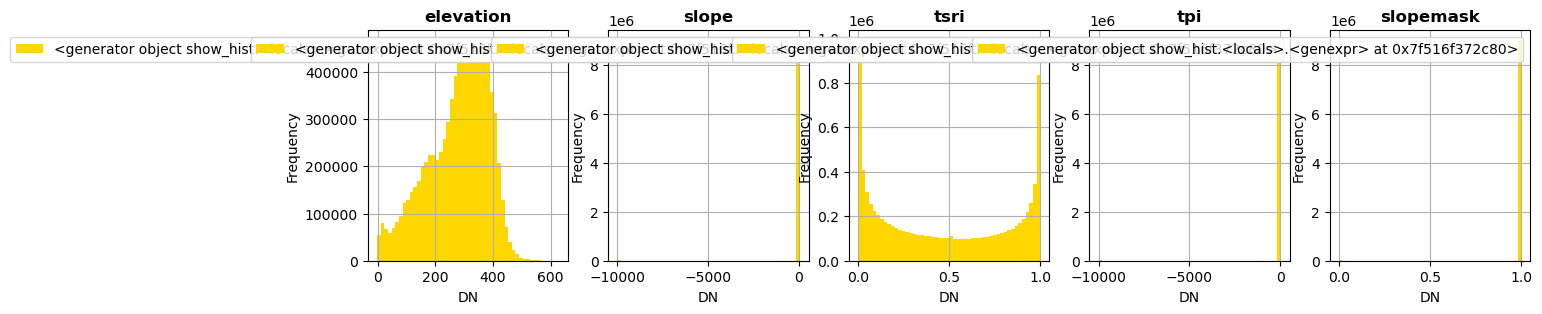

In [27]:
if True:
    fig, axes = plt.subplots(1,n, figsize=(n*3,3))

    for i in range(n):
        show_hist(topo_stack[i], ax=axes[i], title=topo_stack_names[i], bins=50, lw=0.0, stacked=True, alpha=1, label=None)
